# SQL Employee Records Bonus Analysis
----

Written in the Python 3.7.9 Environment

By Nicole Lund

In [1]:
# Load Dependencies
import sys
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine
from sqlalchemy import MetaData

In [2]:
# Import postgres key 
# Note, user needs to create an analygous file and reference it here
sys.path.append(r"C:\Users\nlund\Documents\GitHub\untracked_files")
from postgres_pswd import user, passwd

In [3]:
# Identify database location
database_path = "localhost:5432/sql-challenge"

In [4]:
# Create a connection to the database
engine = create_engine(f"postgresql+psycopg2://{user}:{passwd}@{database_path}")
conn = engine.connect()

In [5]:
# Query All Records in the the Census Table and load into pandas
data = pd.read_sql("SELECT e.emp_no, s.salary, e.emp_title_id, t.title  FROM employees AS e     INNER JOIN salaries AS s    ON e.emp_no = s.emp_no  INNER JOIN titles AS t  ON e.emp_title_id = t.title_id;", conn)
data.head()

,emp_no,salary,emp_title_id,title
0,246449,87084,s0001,Staff
1,67799,48111,e0002,Engineer
2,299898,63315,s0001,Staff
3,492723,46740,e0003,Senior Engineer
4,411614,54770,e0003,Senior Engineer


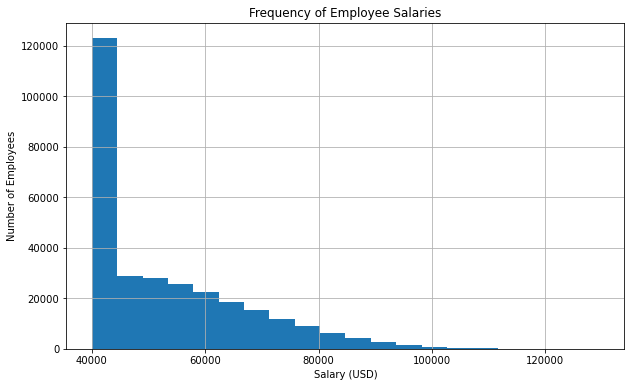

In [8]:
# 2.Create a histogram to visualize the most common salary ranges for employees.

data.hist(column='salary', bins=20, figsize=(10,6))
plt.title('Frequency of Employee Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Employees')
plt.savefig('histogram_salary.png',facecolor='w')
plt.show()

In [7]:
# Collect average salary by title.
title_group = data.groupby('title')
salary_stats_df = pd.DataFrame( \
    {"Mean":title_group["salary"].mean(), \
     "Median":title_group["salary"].median(),
     "Var":title_group["salary"].var(),
     "StdDev":title_group["salary"].std(),
     "SEM":title_group["salary"].sem()})
salary_stats_df

,Mean,Median,Var,StdDev,SEM
title,,,,,
Assistant Engineer,48564.434447,44588.0,1.057043e+08,10281.259519,134.594059
Engineer,48535.336511,44478.0,1.069293e+08,10340.663069,47.544912
Manager,51531.041667,48458.5,1.456397e+08,12068.128725,2463.396460
Senior Engineer,48506.799871,44502.0,1.051134e+08,10252.482143,32.792710
Senior Staff,58550.172704,56585.0,2.713884e+08,16473.869221,101.040065
Staff,58465.382850,56407.0,2.722337e+08,16499.506888,50.350197
Technique Leader,48582.896092,44546.0,1.064063e+08,10315.342481,83.811961


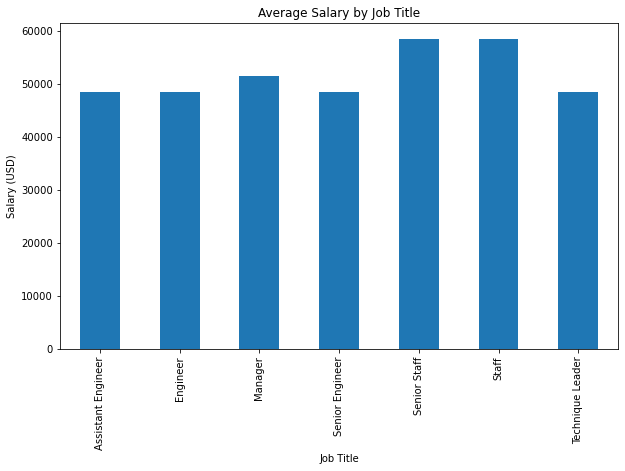

In [9]:
# 3.Create a bar chart of average salary by title.
salary_stats_df['Mean'].plot(kind='bar',figsize=(10,6))
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.savefig('salary_by_job.png',facecolor='w')
plt.show()